In [14]:
"""
(2) Classificação Binária

Escolher um Dataset com o Kaggle Dataset.
Construir um código com python que implemente um Modelo de
Machine Learning de Classificação Binária, escolha o algoritimo e
faça o processo de Validação e Avaliação do Modelo de Machine
Learning com Acurácia, precisão, F1 Score e Matriz de Confusão.
"""

'\n(2) Classificação Binária\n\nEscolher um Dataset com o Kaggle Dataset.\nConstruir um código com python que implemente um Modelo de\nMachine Learning de Classificação Binária, escolha o algoritimo e\nfaça o processo de Validação e Avaliação do Modelo de Machine\nLearning com Acurácia, precisão, F1 Score e Matriz de Confusão.\n'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    HuberRegressor
)
from sklearn.metrics import (
    r2_score,
    root_mean_squared_error,
    mean_squared_error
)

In [ ]:
dados_plantacao = pd.read_csv("dataset_milho_regressao.csv", encoding="utf-8")

# ANÁLISE INICIAL
print(dados_plantacao.info())
print("\n")
dados_plantacao.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipo_solo                  500 non-null    object 
 1   ph_solo                    500 non-null    float64
 2   umidade_solo_inicial       500 non-null    float64
 3   tipo_semente               500 non-null    object 
 4   chuva_total_estimada_mm    500 non-null    float64
 5   temperatura_media_ciclo    500 non-null    float64
 6   dias_geada                 500 non-null    int64  
 7   horas_sol_dia              500 non-null    float64
 8   sistema_irrigacao          500 non-null    object 
 9   uso_fertilizante_kg_ha     500 non-null    float64
 10  uso_inseticida_l_ha        500 non-null    float64
 11  uso_herbicida_l_ha         500 non-null    float64
 12  numero_funcionarios        500 non-null    int64  
 13  mecanizacao                500 non-null    object 

,tipo_solo,ph_solo,umidade_solo_inicial,tipo_semente,chuva_total_estimada_mm,temperatura_media_ciclo,dias_geada,horas_sol_dia,sistema_irrigacao,uso_fertilizante_kg_ha,uso_inseticida_l_ha,uso_herbicida_l_ha,numero_funcionarios,mecanizacao,rotacao_culturas,regiao,area_total_plantio_ha,produtividade_milho_kg_ha
0,siltoso,6.53,30.9,crioula,929.2,27.2,5,8.9,aspersão,147.7,1.90,3.28,9,parcial,sim,Sul,33.6,4386
1,argiloso,7.22,18.1,transgênica,867.5,22.8,5,8.3,pivô central,216.6,3.97,0.26,7,total,não,Nordeste,44.8,4684
2,argiloso,6.97,31.5,transgênica,446.2,24.2,2,9.2,pivô central,157.9,1.54,4.53,1,parcial,sim,Nordeste,8.8,4810
3,siltoso,6.50,29.5,crioula,868.1,21.6,9,8.0,pivô central,207.3,4.93,3.55,3,parcial,sim,Sul,30.9,4775
4,argiloso,6.63,15.5,transgênica,1102.4,25.6,2,8.0,pivô central,245.7,0.78,2.91,5,manual,não,Centro-Oeste,78.2,4342


In [17]:
# PRÉ-PROCESSAMENTO 1 - Convertendo colunas object para numérico:
colunas_categoricas = dados_plantacao.select_dtypes(include='object').columns

dados_plantacao = pd.get_dummies(
    dados_plantacao, columns=colunas_categoricas, drop_first=True
)

In [18]:
print(dados_plantacao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ph_solo                          500 non-null    float64
 1   umidade_solo_inicial             500 non-null    float64
 2   chuva_total_estimada_mm          500 non-null    float64
 3   temperatura_media_ciclo          500 non-null    float64
 4   dias_geada                       500 non-null    int64  
 5   horas_sol_dia                    500 non-null    float64
 6   uso_fertilizante_kg_ha           500 non-null    float64
 7   uso_inseticida_l_ha              500 non-null    float64
 8   uso_herbicida_l_ha               500 non-null    float64
 9   numero_funcionarios              500 non-null    int64  
 10  area_total_plantio_ha            500 non-null    float64
 11  produtividade_milho_kg_ha        500 non-null    int64  
 12  tipo_solo_argiloso    

In [20]:
# PRÉ-PROCESSAMENTO 2 - Normalização:
colunas_normalizar = [
    'ph_solo',
    'umidade_solo_inicial',
    'chuva_total_estimada_mm',
    'temperatura_media_ciclo',
    'dias_geada',
    'horas_sol_dia',
    'uso_fertilizante_kg_ha',
    'uso_inseticida_l_ha',
    'uso_herbicida_l_ha',
    'numero_funcionarios',
    'area_total_plantio_ha'
]

scaler = MinMaxScaler()
scaler.fit(dados_plantacao[colunas_normalizar])

MinMaxScaler()

In [21]:
x = np.array(dados_plantacao[[
    'ph_solo',
    'umidade_solo_inicial',
    'chuva_total_estimada_mm',
    'temperatura_media_ciclo',
    'dias_geada',
    'horas_sol_dia',
    'uso_fertilizante_kg_ha',
    'uso_inseticida_l_ha',
    'uso_herbicida_l_ha',
    'numero_funcionarios',
    'area_total_plantio_ha',
    'tipo_solo_argiloso',
    'tipo_solo_misto',
    'tipo_solo_siltoso',
    'tipo_semente_híbrida',
    'tipo_semente_transgênica',
    'sistema_irrigacao_gotejamento',
    'sistema_irrigacao_pivô central',
    'sistema_irrigacao_sem irrigação',
    'mecanizacao_parcial',
    'mecanizacao_total',
    'rotacao_culturas_sim',
    'regiao_Nordeste',
    'regiao_Norte',
    'regiao_Sudeste',
    'regiao_Sul'
]])
y = np.array(dados_plantacao[['produtividade_milho_kg_ha']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [30]:
# O modelo será treinado com vários algoritmos de regressão linear diferentes,
# para avaliar a diferença de performance entre eles.

modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "HuberRegressor": HuberRegressor(max_iter=10000)
}



  ALGORITMO: LinearRegression
  MSE: 100741.31
  RMSE: 317.40
  R² : 0.52


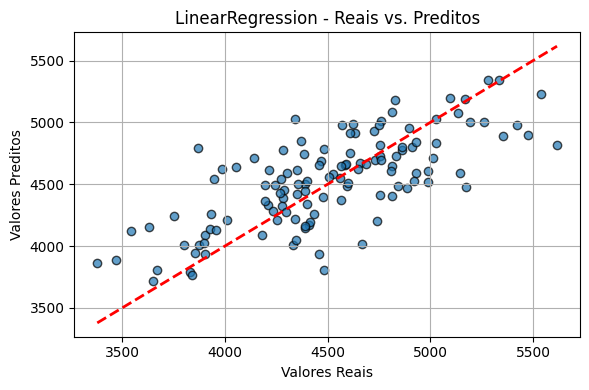



  ALGORITMO: Ridge
  MSE: 99923.64
  RMSE: 316.11
  R² : 0.53


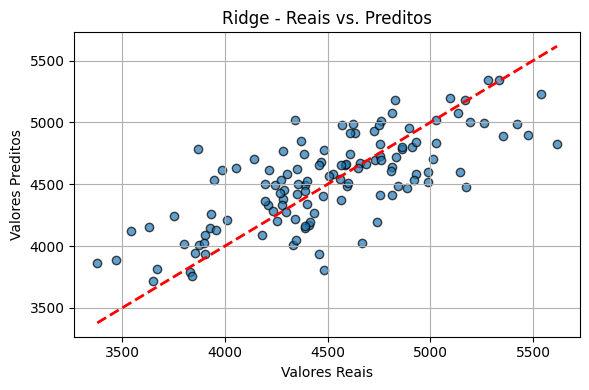



  ALGORITMO: Lasso
  MSE: 96946.56
  RMSE: 311.36
  R² : 0.54


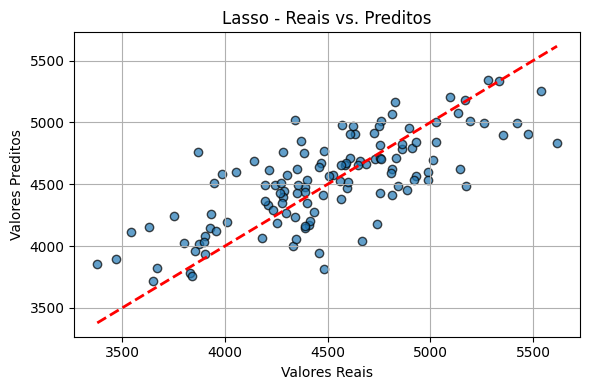



  ALGORITMO: ElasticNet
  MSE: 86327.66
  RMSE: 293.82
  R² : 0.59


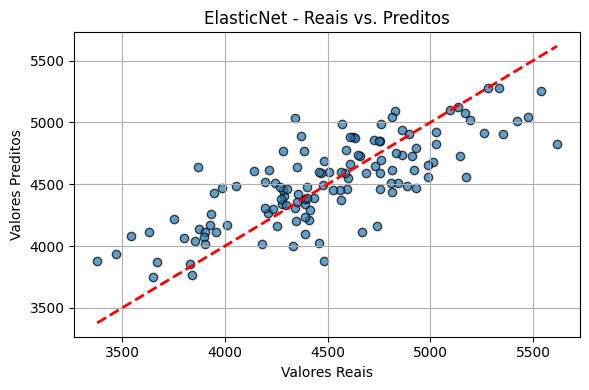



  ALGORITMO: HuberRegressor
  MSE: 102321.42
  RMSE: 319.88
  R² : 0.51


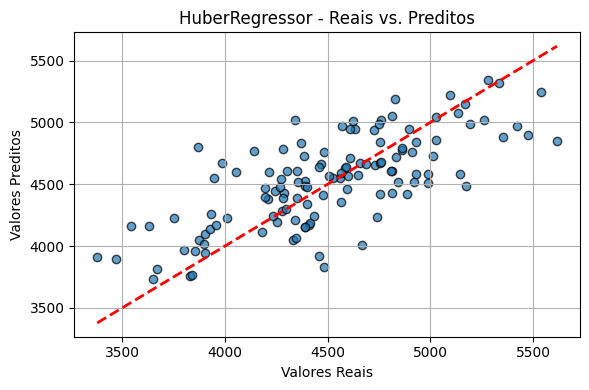

In [32]:
# TREINANDO E GERANDO MÉTRICAS
for nome, modelo in modelos.items():
    modelo.fit(x_train, y_train.ravel())
    y_pred = modelo.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n")
    print(f"  ALGORITMO: {nome}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² : {r2:.2f}")

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Preditos")
    plt.title(f"{nome} - Reais vs. Preditos")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

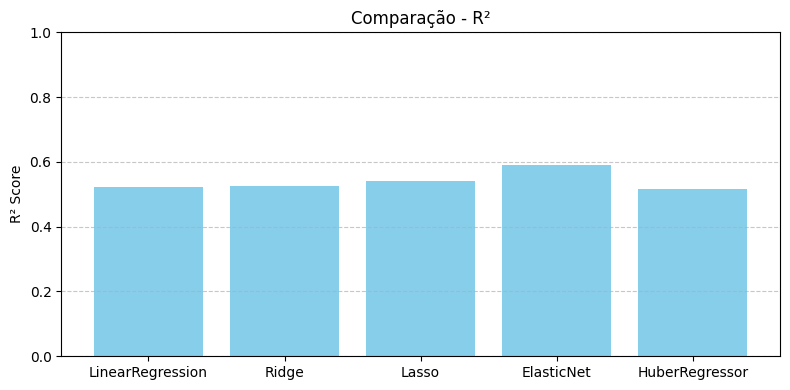

In [34]:
# COMPARANDO R2
nomes_modelos = []
r2_scores = []

for nome, modelo in modelos.items():
    modelo.fit(x_train, y_train.ravel())
    y_pred = modelo.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    nomes_modelos.append(nome)
    r2_scores.append(r2)

plt.figure(figsize=(8, 4))
plt.bar(nomes_modelos, r2_scores, color='skyblue')
plt.ylabel("R² Score")
plt.title("Comparação - R²")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()